In [16]:
%matplotlib inline

import glob
import os

import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 14
# mpl.rcParams['text.usetex'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.labelsize'] = 14

In [17]:
mock_params = []
num_mocks = 10
for i in range(num_mocks):
    mock_params.append(np.genfromtxt('../baofit/mock-{:03d}-save.pars'.format(i)))
mock_params = np.array(mock_params)

In [18]:
alpha_para_index = 8
alpha_perp_index = 9

value_index = 1
error_index = 2

alpha_para = mock_params[:, alpha_para_index, value_index]
alpha_para_error = mock_params[:, alpha_para_index, error_index]

alpha_perp = mock_params[:, alpha_perp_index, value_index]
alpha_perp_error = mock_params[:, alpha_perp_index, error_index]

In [19]:
mock_params[:, (8,9)][:, :, 2]

array([[ 0.02533364,  0.04117196],
       [ 0.02136843,  0.04344745],
       [ 0.02655719,  0.07036758],
       [ 0.0311508 ,  0.05316708],
       [ 0.02458563,  0.05655098],
       [ 0.0270483 ,  0.14409621],
       [ 0.03661457,  0.08436691],
       [ 0.02535877,  0.04241707],
       [ 0.02512201,  0.04194279],
       [ 0.02076615,  0.05858979]])

In [20]:
alpha_para_error

array([ 0.02533364,  0.02136843,  0.02655719,  0.0311508 ,  0.02458563,
        0.0270483 ,  0.03661457,  0.02535877,  0.02512201,  0.02076615])

In [21]:
alpha_perp_error

array([ 0.04117196,  0.04344745,  0.07036758,  0.05316708,  0.05655098,
        0.14409621,  0.08436691,  0.04241707,  0.04194279,  0.05858979])

In [22]:
alpha_para_weight = alpha_para_error**-2
alpha_perp_weight = alpha_perp_error**-2

In [23]:
alpha_para_mean = np.average(alpha_para, weights=alpha_para_weight)
alpha_perp_mean = np.average(alpha_perp, weights=alpha_perp_weight)

In [24]:
alpha_para_var = np.average((alpha_para - alpha_para_mean)**2, weights=alpha_para_weight)
alpha_perp_var = np.average((alpha_perp - alpha_perp_mean)**2, weights=alpha_perp_weight)

In [25]:
def plot_xy(ix, iy):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    x = mock_params[:, ix, value_index]
    x_err = mock_params[:, ix, error_index]
    
    y = mock_params[:, iy, value_index]
    y_err = mock_params[:, iy, error_index]
    
    ax.scatter(x, y)
    
    ax.tick_params(direction='in', labelsize=16)
    ax.grid(True)

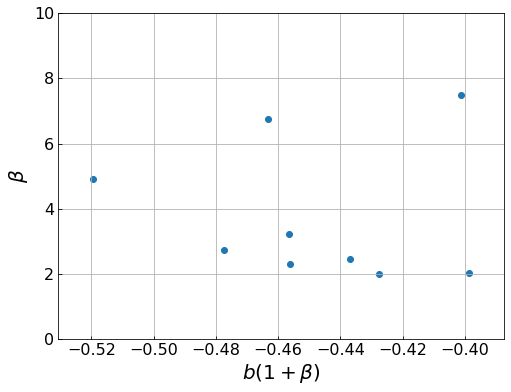

In [26]:
plot_xy(1, 0)
plt.xlabel(r'$b(1 + \beta)$', fontsize=20)
plt.ylabel(r'$\beta$', fontsize=20)
plt.ylim(0, 10)
plt.show()

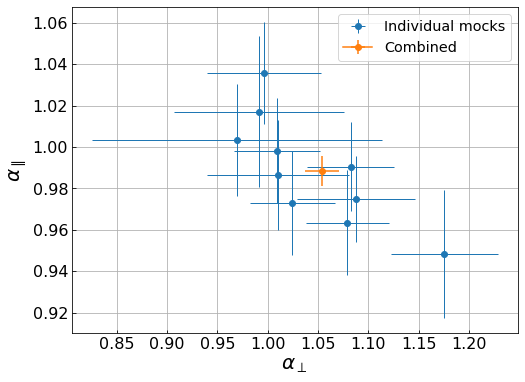

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(
    alpha_perp, 
    alpha_para, 
    xerr=alpha_perp_error, 
    yerr=alpha_para_error, 
    marker='o', mew=1,
    lw=0, elinewidth=1, label='Individual mocks')

ax.errorbar(
    alpha_perp_mean,
    alpha_para_mean, 
    xerr=np.sqrt(alpha_perp_var/num_mocks),
    yerr=np.sqrt(alpha_para_var/num_mocks),
    marker='o',
    label='Combined'
)

# ax.errorbar(
#     alpha_perp_mean,
#     alpha_para_mean, 
#     xerr=np.sqrt(1.0/np.sum(alpha_perp_weight)),
#     yerr=np.sqrt(1.0/np.sum(alpha_para_weight)),
#     label='Weighted Std Dev'
# )

# ax.set_ylim(0.5, 1.5)
# ax.set_xlim(0.5, 1.5)

ax.set_xlabel(r'$\alpha_\perp$', fontsize=20)
ax.set_ylabel(r'$\alpha_\parallel$', fontsize=20)

ax.tick_params(labelsize=16)

ax.legend(fontsize='large')

ax.grid(True)

In [28]:
noiseless = np.loadtxt('pylya_summary_full.txt')

In [29]:
noiseless[0, (0, 1, 4)]

array([ 0.      ,  0.991826,  1.021613])

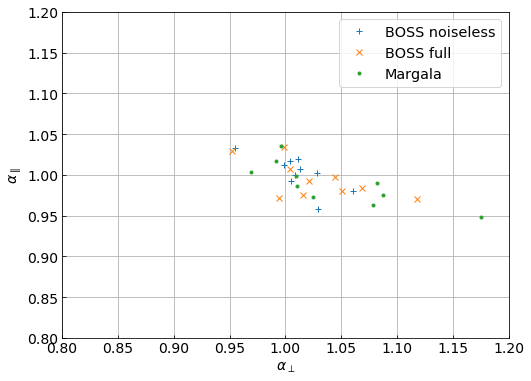

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

for name, marker in zip(('noiseless', 'full'), ('+', 'x')):
    summary = np.loadtxt('pylya_summary_{}.txt'.format(name))

    i, ap, ap_err_lo, ap_err_hi, at, at_err_lo, at_err_hi = summary[:, (0, 1, 2, 3, 4, 5, 6)].T

    ax.errorbar(
        at[:10], 
        ap[:10], 
        marker=marker, mew=1,
        lw=0, elinewidth=1, label='BOSS {}'.format(name))

    
ax.errorbar(
    alpha_perp, 
    alpha_para, 
    marker='.', mew=1,
    lw=0, elinewidth=1, label='Margala')


ax.set_ylim(0.8, 1.2)
ax.set_xlim(0.8, 1.2)

ax.set_xlabel(r'$\alpha_\perp$')
ax.set_ylabel(r'$\alpha_\parallel$')

ax.legend(fontsize='large')
# ax.set_aspect('equal')

ax.grid(True)

plt.savefig('mock-alphas.png', dpi=100, bbox_inches='tight')